<a href="https://colab.research.google.com/github/Barros313/Big-Data-1---Senac-TADS028/blob/main/pyspark/infracoes_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Infrações de Trânsito em Recife (2023)

## Introdução

### Configurando e inicializando ambiente

Instalando pyspark utilizando pip

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b05e7cb81cabf23de5ee8e4e03365d210f982f8491771771d61197e5825a5020
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Importando dependências, baixando CSV e criando dataframe

In [2]:
from os import sep
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# URL do Dataset
url = 'http://dados.recife.pe.gov.br/dataset/6399f689-f1a7-453b-b839-413bd665c355/resource/c269789d-da47-4dde-8ce7-42fba10fe8e2/download/relatorioinfracoestransparencia-janeiro-ate-novembro-2023.csv'

# Nome dado ao arquivo gerado
output = 'infracoes.csv'

# Download do arquivo
urllib.request.urlretrieve(url, output)

# Inicialização do SparkSession
spark = SparkSession.builder.appName('infracoes').getOrCreate()

# Criação do Dataframe Spark
df = spark.read.csv('infracoes.csv', encoding='ISO-8859-1' ,sep=';', header=True, inferSchema=True)
df.printSchema()

root
 |-- datainfracao: date (nullable = true)
 |-- horainfracao: timestamp (nullable = true)
 |-- dataimplantacao: date (nullable = true)
 |-- agenteequipamento: string (nullable = true)
 |-- infracao: integer (nullable = true)
 |-- descricaoinfracao: string (nullable = true)
 |-- amparolegal: string (nullable = true)
 |-- localcometimento: string (nullable = true)



### Amostra

Amostra com 20 registro do dataframe com Pandas

In [3]:
# Exemplo do Dataframe com pandas
pd.DataFrame(df.take(20), columns=df.columns)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2023-01-01,2024-06-17 00:01:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,7234,Quando o veículo estiver em movimento deixar d...,"Art. 250, Inc. I, alínea a","RUA RIBEIRO DE BRITO, SOB O SEMAFORO N. 155"
1,2023-01-01,2024-06-17 00:27:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5835,Desobedecer às ordens emanadas da autoridade c...,Art. 195,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
2,2023-01-01,2024-06-17 00:27:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5215,Dirigir ameaçando os pedestres que estejam atr...,Art. 170,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
3,2023-01-01,2024-06-17 00:52:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
4,2023-01-01,2024-06-17 00:52:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
5,2023-01-01,2024-06-17 00:54:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
6,2023-01-01,2024-06-17 00:55:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
7,2023-01-01,2024-06-17 00:55:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
8,2023-01-01,2024-06-17 00:55:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
9,2023-01-01,2024-06-17 00:57:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."


## Tratamento de dados


### Verificar valores nulos

Verificando por caracteres nulos em todas as colunas do dataframe

In [4]:
from pyspark.sql.functions import *

df.select([count(when(col(column).isNull(), column)).alias(column) for column in df.columns]).toPandas()

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,0,0,0,0,0,0,0,0


### Passando atributos para maiúsculo

Amotra com 5 registros da tabela para identificar colunas com texto

In [5]:
# Amostra com 5 registros para identificar colunas com texto
pd.DataFrame(df.take(5), columns=df.columns)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2023-01-01,2024-06-17 00:01:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,7234,Quando o veículo estiver em movimento deixar d...,"Art. 250, Inc. I, alínea a","RUA RIBEIRO DE BRITO, SOB O SEMAFORO N. 155"
1,2023-01-01,2024-06-17 00:27:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5835,Desobedecer às ordens emanadas da autoridade c...,Art. 195,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
2,2023-01-01,2024-06-17 00:27:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5215,Dirigir ameaçando os pedestres que estejam atr...,Art. 170,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
3,2023-01-01,2024-06-17 00:52:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
4,2023-01-01,2024-06-17 00:52:00,2023-01-06,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."


Query com todas as colunas que contém atributos com texto

In [6]:
from pyspark.sql.functions import upper

# Query para alterar valores de colunas
df_uppercase_values = df.withColumn('agenteequipamento', upper(col('agenteequipamento'))) \
                        .withColumn('descricaoinfracao', upper(col('descricaoinfracao'))) \
                        .withColumn('amparolegal', upper(col('amparolegal'))) \
                        .withColumn('localcometimento', upper(col('localcometimento')))

# Teste
pd.DataFrame(df_uppercase_values.take(5), columns=df_uppercase_values.columns)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2023-01-01,2024-06-17 00:01:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,7234,QUANDO O VEÍCULO ESTIVER EM MOVIMENTO DEIXAR D...,"ART. 250, INC. I, ALÍNEA A","RUA RIBEIRO DE BRITO, SOB O SEMAFORO N. 155"
1,2023-01-01,2024-06-17 00:27:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5835,DESOBEDECER ÀS ORDENS EMANADAS DA AUTORIDADE C...,ART. 195,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
2,2023-01-01,2024-06-17 00:27:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5215,DIRIGIR AMEAÇANDO OS PEDESTRES QUE ESTEJAM ATR...,ART. 170,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
3,2023-01-01,2024-06-17 00:52:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5550,ESTACIONAR O VEÍCULO EM LOCAIS E HORÁRIOS PROI...,"ART. 181, INC. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
4,2023-01-01,2024-06-17 00:52:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5550,ESTACIONAR O VEÍCULO EM LOCAIS E HORÁRIOS PROI...,"ART. 181, INC. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."


Importar resultados anteriores para o dataframe original 'df'

In [7]:
df = df_uppercase_values;

pd.DataFrame(df.take(5), columns=df.columns)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2023-01-01,2024-06-17 00:01:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,7234,QUANDO O VEÍCULO ESTIVER EM MOVIMENTO DEIXAR D...,"ART. 250, INC. I, ALÍNEA A","RUA RIBEIRO DE BRITO, SOB O SEMAFORO N. 155"
1,2023-01-01,2024-06-17 00:27:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5835,DESOBEDECER ÀS ORDENS EMANADAS DA AUTORIDADE C...,ART. 195,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
2,2023-01-01,2024-06-17 00:27:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5215,DIRIGIR AMEAÇANDO OS PEDESTRES QUE ESTEJAM ATR...,ART. 170,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
3,2023-01-01,2024-06-17 00:52:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5550,ESTACIONAR O VEÍCULO EM LOCAIS E HORÁRIOS PROI...,"ART. 181, INC. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
4,2023-01-01,2024-06-17 00:52:00,2023-01-06,CÓDIGO 8 - AUTOS NO TALÃO ELETRÔNICO,5550,ESTACIONAR O VEÍCULO EM LOCAIS E HORÁRIOS PROI...,"ART. 181, INC. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."


### Verificando colunas individualmente


#### *Infração*

Verificando por caracteres não numéricos na coluna infração

In [8]:
infracao_nan_count = df.filter(isnan(col('infracao'))).count()

print(f'Caracteres não numéricos na coluna infracao: {infracao_nan_count}')

Caracteres não numéricos na coluna infracao: 0


#### Amparo Legal

Verificando valores únicos e ordenando por ordem alfabética para detectar valores inválidos



In [9]:
df.select('amparolegal').distinct().orderBy('amparolegal').toPandas()

,amparolegal
0,"ART. 162, INC. I"
1,"ART. 162, INC. II"
2,"ART. 162, INC. III"
3,"ART. 162, INC. V"
4,"ART. 162, INC. VI"
...,...
183,ART.168
184,"ART.244, INC. VII, C/C §1º"
185,"ILHA DO LEITE, SENTIDO BOA VIAGEM."
186,SENTIDO CIDADE/SUBURBIO.


Substituindo valores inválidos por 'INDEFINIDO'

In [10]:
df_amparolegal_adjusted = df.withColumn('amparolegal', when(col('amparolegal').contains('SENTIDO'), 'INDEFINIDO (VALOR INVÁLIDO)').otherwise(col('amparolegal')))

# Teste
df_amparolegal_adjusted.select('amparolegal').distinct().orderBy('amparolegal').toPandas()

,amparolegal
0,"ART. 162, INC. I"
1,"ART. 162, INC. II"
2,"ART. 162, INC. III"
3,"ART. 162, INC. V"
4,"ART. 162, INC. VI"
...,...
181,"ART. 254, INC. VI"
182,"ART. 278, § ÚNICO C/C 210"
183,ART.168
184,"ART.244, INC. VII, C/C §1º"


Atribuindo resultado para dataframe original

In [11]:
df = df_amparolegal_adjusted

df.select('amparolegal').distinct().orderBy('amparolegal').toPandas()

,amparolegal
0,"ART. 162, INC. I"
1,"ART. 162, INC. II"
2,"ART. 162, INC. III"
3,"ART. 162, INC. V"
4,"ART. 162, INC. VI"
...,...
181,"ART. 254, INC. VI"
182,"ART. 278, § ÚNICO C/C 210"
183,ART.168
184,"ART.244, INC. VII, C/C §1º"


## Análise de Dados

### Infrações por mês

<Figure size 1000x600 with 0 Axes>

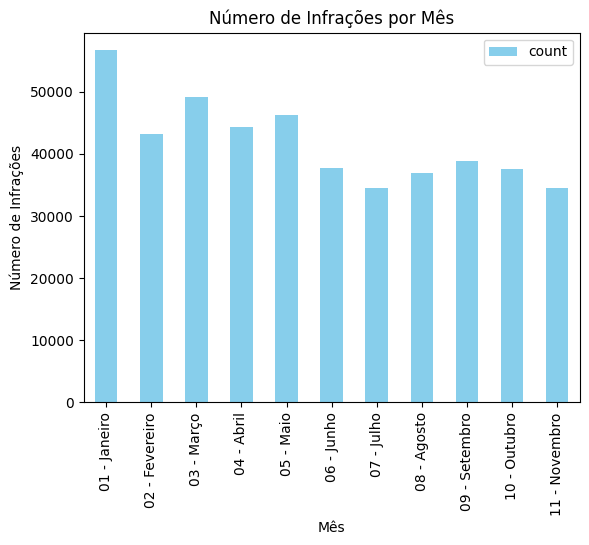

In [29]:
# Extrair número de infrações por mês
df_occurrences_by_month = df.groupBy(month("datainfracao").alias("mes")).count().orderBy('mes')

# Lista com associação de número por nome de mês
mapa_meses = {
    1: '01 - Janeiro',
    2: '02 - Fevereiro',
    3: '03 - Março',
    4: '04 - Abril',
    5: '05 - Maio',
    6: '06 - Junho',
    7: '07 - Julho',
    8: '08 - Agosto',
    9: '09 - Setembro',
    10: '10 - Outubro',
    11: '11 - Novembro',
    12: '12 - Dezembro',
}

# Substituição de valores numéricos por string com nome do mês
df_occurrences_by_month = df_occurrences_by_month.withColumn(
    "mes",
    when(col("mes") == 1, mapa_meses[1])
    .when(col("mes") == 2, mapa_meses[2])
    .when(col("mes") == 3, mapa_meses[3])
    .when(col("mes") == 4, mapa_meses[4])
    .when(col("mes") == 5, mapa_meses[5])
    .when(col("mes") == 6, mapa_meses[6])
    .when(col("mes") == 7, mapa_meses[7])
    .when(col("mes") == 8, mapa_meses[8])
    .when(col("mes") == 9, mapa_meses[9])
    .when(col("mes") == 10, mapa_meses[10])
    .when(col("mes") == 11, mapa_meses[11])
    .when(col("mes") == 12, mapa_meses[12])
    .otherwise(col("mes"))
)

# Criação do gráfico
plt.figure(figsize=(10, 6))
df_occurrences_by_month.toPandas().plot(x='mes', y='count', kind='bar', color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Número de Infrações')
plt.title('Número de Infrações por Mês')
plt.show()

### Infrações por hora

<Figure size 1000x600 with 0 Axes>

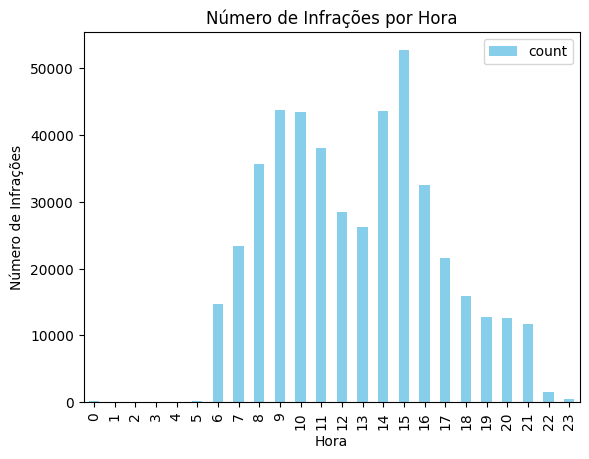

In [32]:
df_occurrences_by_hour = df.groupBy(hour('horainfracao').alias('hora')).count().orderBy('hora')

plt.figure(figsize=(10, 6))
df_occurrences_by_hour.toPandas().plot(x='hora', y='count', kind='bar', color='skyblue')
plt.xlabel('Hora')
plt.ylabel('Número de Infrações')
plt.title('Número de Infrações por Hora')
plt.show()

### Infrações cometidas por hora ordenado pelo maior número de ocorrência

Agrupando todas as principais ocorrências por hora e exibindo os 5 resultados com maiores ocorrências de infrações e sua respectiva descrição

In [53]:
from pyspark.sql.window import Window

pd.set_option('display.max_colwidth', None)

# Selecionar descrições de infrações
df_descricaoinfracao = df.groupBy('descricaoinfracao').count().orderBy('count', ascending=False)

# Formatar coluna Hora Infração e selecionar valores
df_cast_timestamp = df.withColumn('horainfracao', df['horainfracao'].cast('timestamp'))
df_hora_column = df_cast_timestamp.withColumn('hora', hour('horainfracao'))

# Agrupar valores
df_grouped_descricao_hour = df_hora_column.groupBy('hora', 'descricaoinfracao').count()

windownSpec = Window.partitionBy('hora').orderBy(col('count').desc())

# Rankear infrações cometidas por horário
df_ranked_descricao_hour = df_grouped_descricao_hour.withColumn('rank', row_number().over(windownSpec))
df_top_descriptions = df_ranked_descricao_hour.filter(col('rank') == 1).drop('rank')

# Relacionar infração com hora e ordenar hora por quantidade de infrações cometidas
df_joined_descricao_hour = df.withColumn('hora', hour('horainfracao')).groupBy('hora', 'descricaoinfracao').count().orderBy('hora', 'count', ascending=False)

df_infracoes_por_hora_top_5 = df_top_descriptions.orderBy(col('count').desc()).limit(5).toPandas()

# Mostrar top 5 horário com infrações únicas cometidas
df_top_descriptions.orderBy(col('count').desc()).limit(5).toPandas()


,hora,descricaoinfracao,count
0,15,ESTACIONAR O VEÍCULO EM DESACORDO COM AS CONDI...,16578
1,10,ESTACIONAR O VEÍCULO EM DESACORDO COM AS CONDI...,12635
2,13,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERM...,12394
3,14,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERM...,12047
4,12,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERM...,11386


Gráfico com o comparativo das infrações exibidas acima

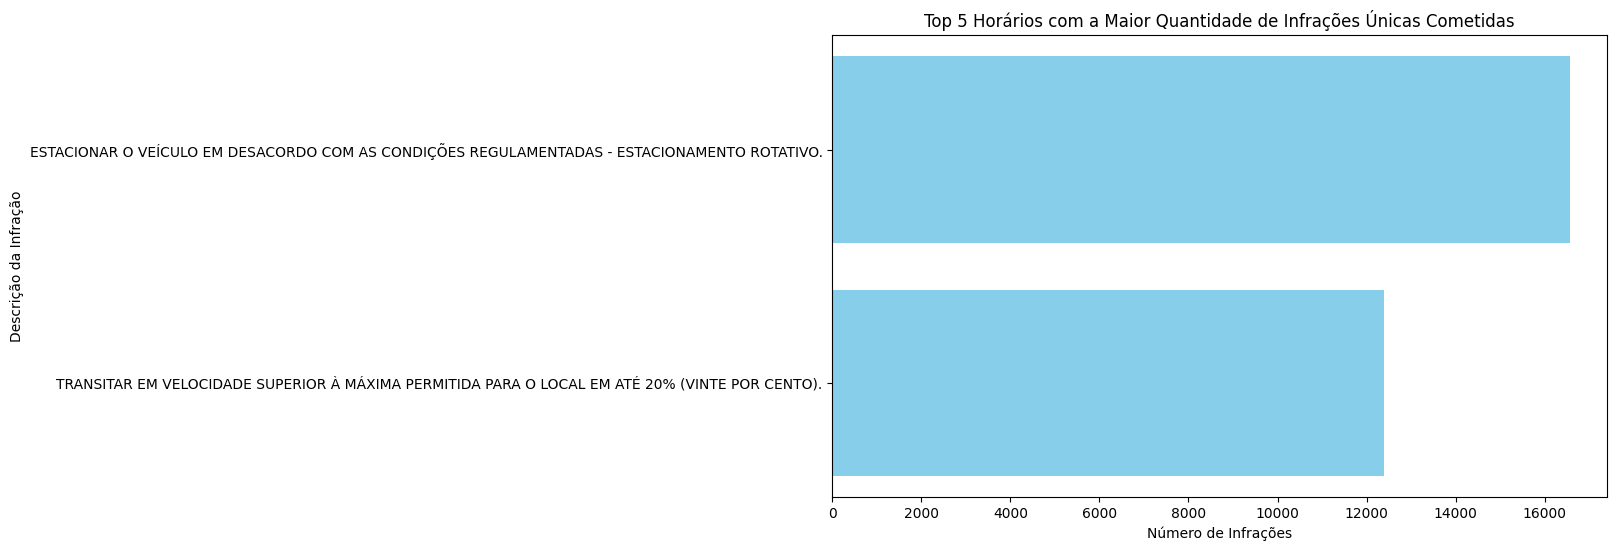

In [52]:
# Gráfico de ocorrências das infrações filtradas acima
plt.figure(figsize=(10, 6))
plt.barh(df_infracoes_por_hora_top_5['descricaoinfracao'], df_infracoes_por_hora_top_5['count'], color='skyblue')
plt.xlabel('Número de Infrações')
plt.ylabel('Descrição da Infração')
plt.title('Top 5 Horários com a Maior Quantidade de Infrações Únicas Cometidas')
plt.gca().invert_yaxis()
plt.show()

### Infrações cometidas por mês ordenado pelo maior número de ocorrências

Mapeamento da infração mais cometida por mês

In [58]:
df_fixed_mes = df.withColumn('mes', df['datainfracao'].cast('date'))

df_occurrences_by_month = df.withColumn('mes', month('datainfracao'))

df_grouped_descricao_mes = df_occurrences_by_month.groupBy('mes', 'descricaoinfracao').count()

windowSpecMes = Window.partitionBy('mes').orderBy(col('count').desc())

df_ranked_descricao_mes = df_grouped_descricao_mes.withColumn('rank', row_number().over(windowSpecMes))

df_top_descricao_por_mes = df_ranked_descricao_mes.filter(col('rank') == 1).drop('rank')

df_top_descricao_por_mes = df_top_descricao_por_mes.withColumn(
    "mes",
    when(col("mes") == 1, mapa_meses[1])
    .when(col("mes") == 2, mapa_meses[2])
    .when(col("mes") == 3, mapa_meses[3])
    .when(col("mes") == 4, mapa_meses[4])
    .when(col("mes") == 5, mapa_meses[5])
    .when(col("mes") == 6, mapa_meses[6])
    .when(col("mes") == 7, mapa_meses[7])
    .when(col("mes") == 8, mapa_meses[8])
    .when(col("mes") == 9, mapa_meses[9])
    .when(col("mes") == 10, mapa_meses[10])
    .when(col("mes") == 11, mapa_meses[11])
    .when(col("mes") == 12, mapa_meses[12])
    .otherwise(col("mes"))
)

pd.set_option('display.max_colwidth', None)

df_top_descricao_por_mes.orderBy(col('count').desc()).toPandas()

,mes,descricaoinfracao,count
0,01 - Janeiro,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,17834
1,04 - Abril,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,17310
2,03 - Março,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,16156
3,05 - Maio,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,15593
4,02 - Fevereiro,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,14026
5,06 - Junho,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,13447
6,10 - Outubro,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,8823
7,07 - Julho,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,8569
8,09 - Setembro,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,8203
9,08 - Agosto,TRANSITAR EM VELOCIDADE SUPERIOR À MÁXIMA PERMITIDA PARA O LOCAL EM ATÉ 20% (VINTE POR CENTO).,7440
